## Chương 3: Convolution and Frequency Domain Filtering

#### __Thuật toán:__ Khử chập (Deconvolution) và lọc nghịch đảo (Inverse Filter) bằng FFT

#### __Giải thích code__

#### 1. Nhập các thư viện cần thiết

In [ ]:
# numpy để xử lý mảng
import numpy as np                  
# pylab để vẽ đồ thị        
import pylab                                
# imread từ skimage.io để đọc ảnh
from skimage.io import imread               
# rgb2gray từ skimage.color để chuyển đổi ảnh sang grayscale
from skimage.color import rgb2gray          
# gaussian từ scipy.signal.windows để tạo Gaussian kernel
from scipy.signal.windows import gaussian   
# scipy.fftpack để thực hiện biến đổi Fourier
import scipy.fftpack as fp                  

#### 2. Đọc ảnh và chuẩn bị Gaussian Kernel

In [ ]:
# Đọc ảnh từ đường dẫn và chuyển đổi ảnh sang grayscale
im = 255*rgb2gray(imread('../images/monalisa.jpg'))                     
# Tạo Gaussian Kernel 2D bằng cách lấy tích ngoài của hai Gaussian Kernel 1D
gauss_kernel = np.outer(gaussian(im.shape[0], 3), gaussian(im.shape[1], 3)) 
# Thực hiện biến đổi Fourier trên ảnh gốc im
freq = fp.fft2(im)                                                      
# Thực hiện biến đổi Fourier trên Gaussian Kernel đã dịch chuyển
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))                       
# Nhân phổ của ảnh với phổ của Gaussian Kernel để làm mờ ảnh (theo định lý tích chập)
convolved = freq*freq_kernel                                            
# Thực hiện biến đổi Fourier ngược để thu được ảnh đã làm mờ im_blur
im_blur = fp.ifft2(convolved).real                                      
# Chuẩn hóa ảnh đã làm mờ để giá trị pixel nằm trong khoảng [0, 255]
im_blur = 255 * im_blur / np.max(im_blur)                               

#### 3. Khôi phục ảnh bằng bộ lọc nghịch đảo

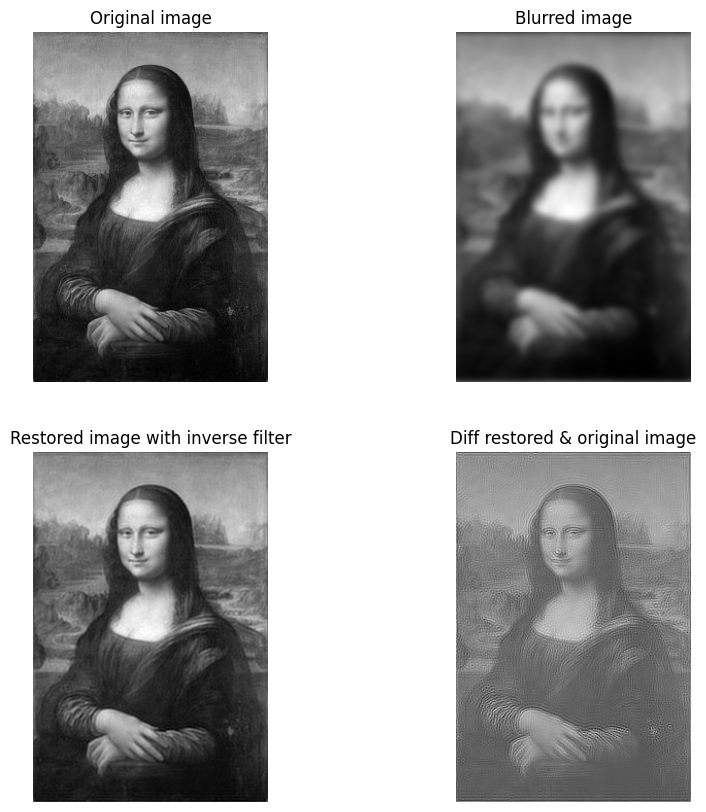

<Figure size 640x480 with 0 Axes>

In [ ]:
# Thêm một giá trị nhỏ epsilon để tránh chia cho 0
epsilon = 10**-6                                          
# Thực hiện biến đổi Fourier trên ảnh đã làm mờ im_blur          
freq = fp.fft2(im_blur)                                             
# Tạo bộ lọc nghịch đảo bằng cách lấy nghịch đảo của phổ Gaussian Kernel
freq_kernel = 1 / (epsilon + freq_kernel)                           
# Nhân phổ của ảnh đã làm mờ với bộ lọc nghịch đảo để khôi phục ảnh
convolved = freq*freq_kernel                                        
# Thực hiện biến đổi Fourier ngược để thu được ảnh đã khôi phục im_restored
im_restored = fp.ifft2(convolved).real                              
# Chuẩn hóa ảnh đã khôi phục để giá trị pixel nằm trong khoảng [0, 255]
im_restored = 255 * im_restored / np.max(im_restored)               
# Tạo một hình ảnh với kích thước 10x10 inch
pylab.figure(figsize=(10,10)) 
# Hiển thị ảnh gốc, ảnh đã làm mờ, ảnh đã khôi phục và sự khác biệt giữa ảnh đã khôi phục và ảnh gốc                                      
pylab.gray()            
pylab.subplot(2,2,1), pylab.imshow(im), pylab.title('Original image'),
pylab.axis('off')
pylab.subplot(2,2,2), pylab.imshow(im_blur), pylab.title('Blurred image'),
pylab.axis('off')
pylab.subplot(2,2,3), pylab.imshow(im_restored), pylab.title('Restored image with inverse filter'), pylab.axis('off')
pylab.subplot(2,2,4), pylab.imshow(im_restored - im), pylab.title('Diff restored & original image'), pylab.axis('off')
# Hiển thị biểu đồ
pylab.show()                                                        
# Lưu biểu đồ thành file restored_image_plot.png
pylab.savefig('restored_image_plot.png', bbox_inches='tight')       